##### **3 신경망**

https://sdr1982.tistory.com/201#google_vignette


- 입력층, 중간층(은닉층), 출력층으로 이루어짐


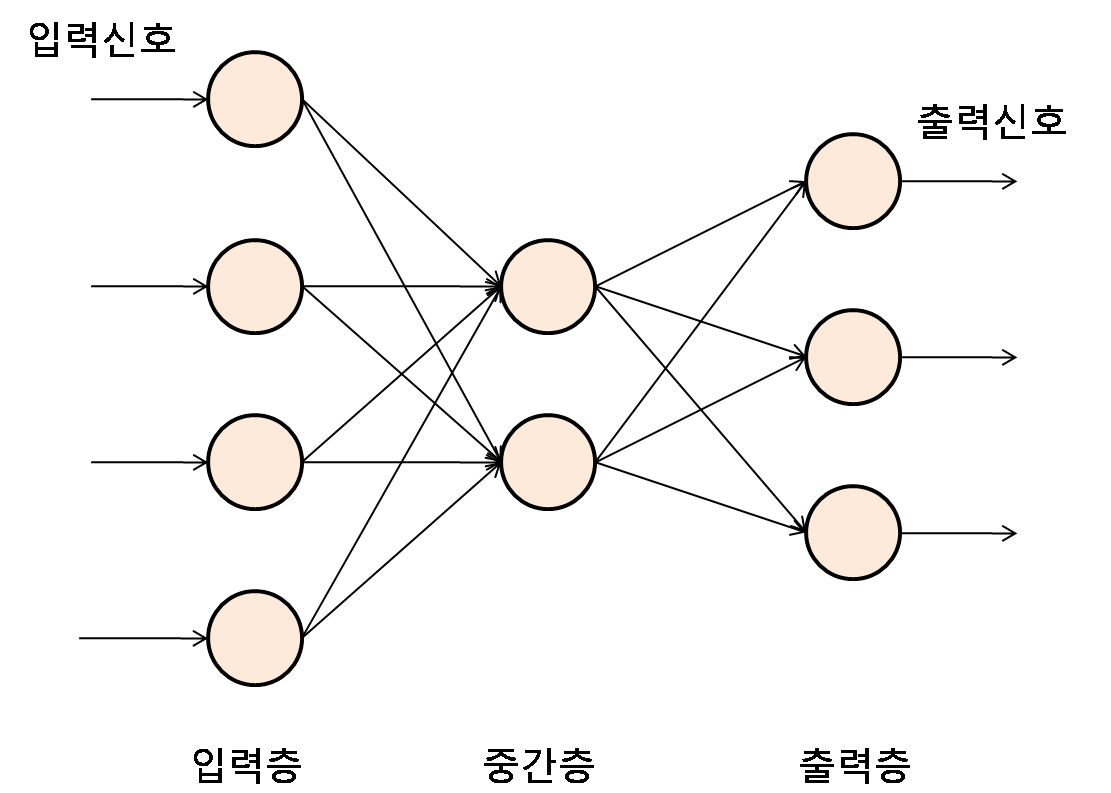

In [1]:
from IPython.display import Image, display
display(Image(filename='images/1.png', embed=True))

- 가중치를 갖는 건 2개이므로 2층 신경망

##### **활성화함수**

입력신호의 총합을 출력 신호로 변환하는 함수
즉, 활성화 할지 말지 정하는 역할

- 퍼셉트론에서는 step function 사용

**시그모이드 함수**

$$h(x) = \frac{1}{1 + \exp(-x)}$$

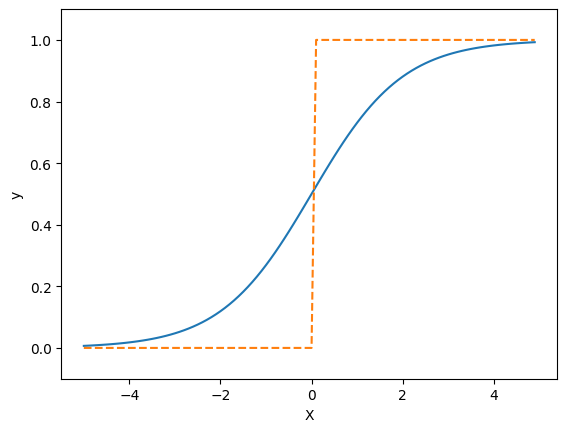

In [12]:
import numpy as np
import matplotlib.pylab as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def step_function(x):
    return np.array(x > 0, dtype=int)

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y1, label="sigmoid")
plt.plot(x, y2, linestyle="--", label="step_function")
plt.xlabel("X") # x축 이름
plt.ylabel("y") # y축 이름
plt.ylim(-0.1, 1.1)
plt.show()

**ReLU (Rectified Linear Unit)**

- 입력이 0을 넘으면 그대로 출력, 안 넘으면 0

$$
h(x) = \begin{cases} 
x & (x > 0) \\ 
0 & (x \le 0) 
\end{cases}
$$

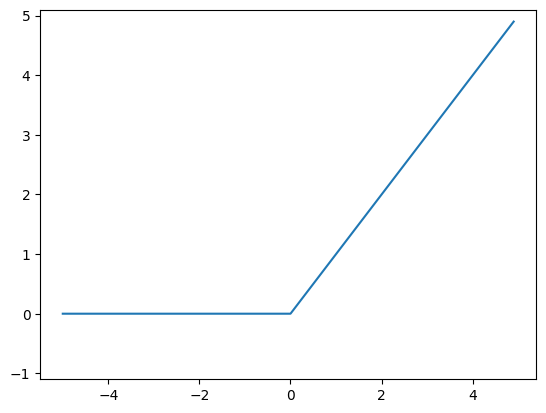

In [13]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.1, 5.1) # y축의 범위 지정
plt.show()

- step function : 0 또는 1
- sigmoid function : 0~1 사이의 연속적인 값
- ReLU : 0 이하면 0, 0 이상이면 입력값 그대로.

모두 비선형 함수임.

---

##### **다차원 배열의 계산**

In [2]:
import numpy as np

# 1차원 배열
A = np.array([1, 2, 3, 4])

print(A)
print(np.ndim(A))  #A의 dimension
print(A.shape)      # A의 형상
print(A.shape[0])   # 0 행의 형상

[1 2 3 4]
1
(4,)
4


In [3]:
# 2차원 배열
B = np.array([[1, 2], [3, 4], [5, 6]])

print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


---

##### **행렬의 곱 (내적)**

앞 행렬의 열 개수와, 뒤 행렬의 행 개수가 같아야함 (2x3 dot 3x2)

In [5]:
A = np.array([[1, 2], [3, 4]])
print(A)
B = np.array([[5, 6], [7, 8]])
print(B)

np.dot(A, B)

[[1 2]
 [3 4]]
[[5 6]
 [7 8]]


array([[19, 22],
       [43, 50]])

---

##### **신경망의 내적**

- 행렬곱으로 신경망의 계산 수행

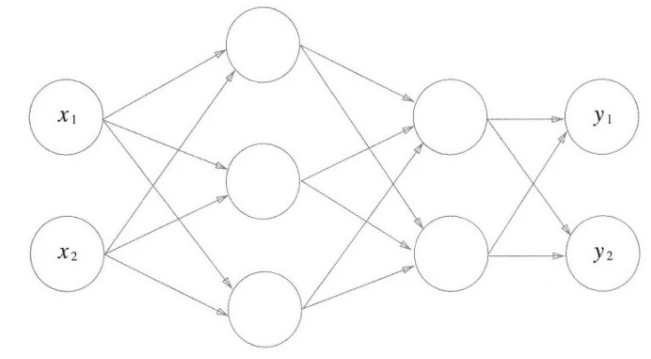

In [13]:
from IPython.display import Image, display
display(Image(filename='images/11.png', embed=True))

- 입력층 2, 1번째 은닉층 3, 2번째 은닉층 2, 출력층 2로 이루어진 신경망을 코드로 표현.

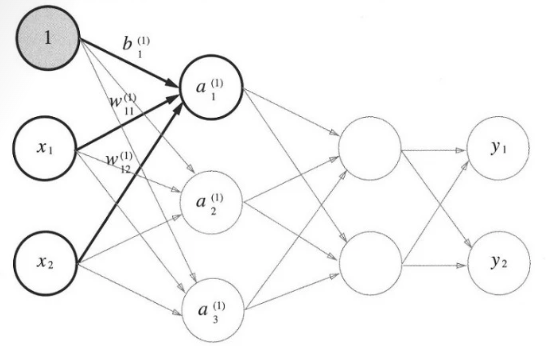

In [14]:
display(Image(filename='images/2.png', embed=True))

첫 번째 은닉층의 첫 번째 노드는 $a_{1}^{(1)} = w_{11}^{(1)}x_1 + w_{12}^{(1)}x_2 + b_1^{(1)}$ 로 표현 가능하다.

간소화시 $$A^{(1)} = XW^{(1)} + B^{(1)}$$

$$
A^{(1)} = \begin{pmatrix} a_1^{(1)} & a_2^{(1)} & a_3^{(1)} \end{pmatrix}, \quad 
X = \begin{pmatrix} x_1 & x_2 \end{pmatrix}, \quad 
B^{(1)} = \begin{pmatrix} b_1^{(1)} & b_2^{(1)} & b_3^{(1)} \end{pmatrix}
$$

$$
W^{(1)} = \begin{pmatrix} 
w_{11}^{(1)} & w_{21}^{(1)} & w_{31}^{(1)} \\ 
w_{12}^{(1)} & w_{22}^{(1)} & w_{32}^{(1)} 
\end{pmatrix}
$$

위 식을 통해 나온 출력을 $A$라고 했을때 이를 활성화함수 $h()$에 넣어 $z$를 구한다.

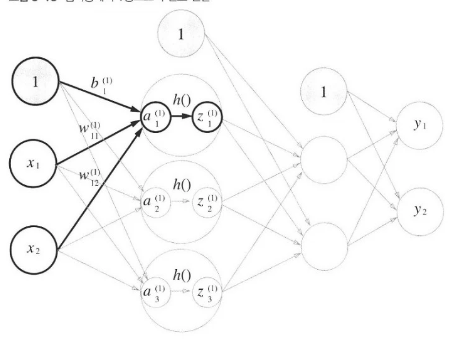

In [15]:
display(Image(filename='images/3.png', embed=True))

활성화 함수를 통해 나온 출력 z는 그대로 다음 층의 입력이 된다. (은닉층에서 반복)

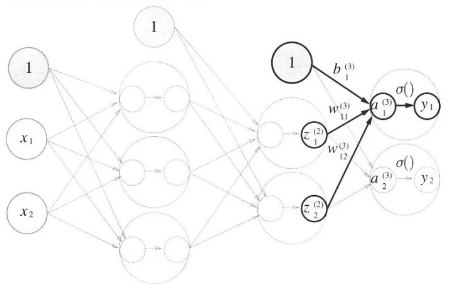

In [16]:
display(Image(filename='images/4.png', embed=True))

마지막으로 출력층에서는 활성화 함수로 입력을 그대로 출력하는 항등 함수를 사용하므로,  <br>
은닉층의 $h()$와 구분하기 위해 $\sigma()$로 표현한다.

**출력층의 활성화 함수**

- 회귀**(Regression)**에는 항등 함수
- 2클래스 분류**(Classification)**에는 sigmoid
- 다중 클래스 분류에는 softmax

---

##### **identity & softmax function**

- Classification: 데이터가 어느 클래스(class)에 속하느냐는 문제
    - 주로 Softmax, sigmoid
- Regression: 입력 데이터에서 (연속적인) 수치를 예측하는 문제
    - 주로 identity (항등함수)

**Identity function**은 입력을 그대로 출력하므로 skip

**Softmax function**

$$y_k = \frac{\exp(a_k)}{\sum_{i=1}^{n} \exp(a_i)}$$

(n = 뉴런층의 수)

즉, softmax의 분자는 입력신호 $a_k$의 지수 함수, 분모는 모든 입력신호의 지수함수의 합 <br>
<br>
**여기서 exponential하므로, 큰 값은 더 크게 해준다.**
또한 항상 양수가 나옴

- softmax의 출력 총합은 1, 출력을 확률로 해석함.
- 학습시킬때는 softmax함수를 사용하나, 추론시에는 출력층의 softmax를 생략한다. 
    - 학습할 때는, 파라미터 수정을 위해 오차 계산이 필요하다. 따라서 softmax가 필요
    - 추론시에는, 가장 높은 값만 찾으면 되니까 계산 속도를 위해 생략


---

##### **손글씨 숫자 인식**

데이터셋을 통해 이미 학습된 매개변수를 활용해서 forward propagation(순전파) 과정 (=추론 과정)을 알아볼 예정. 

In [19]:
import sys, os
sys.path.append(os.pardir) # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist

# 처음 한 번은 몇 분 정도 걸립니다.
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

# 각 데이터의 형상 출력
print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000,)
print(x_test.shape)  # (10000, 784)
print(t_test.shape)  # (10000,)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


**train & test image를 가져와서 라벨과 함께 시각화**

1
(784,)
(28, 28)


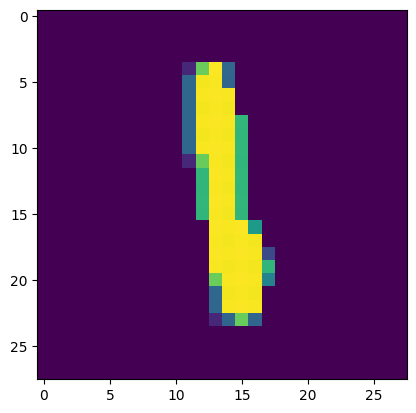

In [32]:

%matplotlib inline
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image
import matplotlib.pylab as plt

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    #pil_img.show()
    plt.imshow(np.array(pil_img))

# image, label 형태로 반환 하기 위한 함수 사용
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[200]
label = t_train[200]

print(label) # 5

print(img.shape)          # (784,)
img = img.reshape(28,28) # 원래 이미지의 모양으로 변형
print(img.shape)          # (28, 28)

img_show(img)

**신경망의 추론 처리 알아보기**

- 입력층 노드를 784, 출력층 노드를 10개로 구성
    - 28by28 image 데이터에 0~9사이의 label을 가지므로
    
- 은닉층은 2개층으로 각각 50개, 100개 노드로 구성함.

In [61]:
import pickle
import sys, os
sys.path.append(os.pardir)
print(os.getcwd())

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

# dataset image와 label 가져오기 (test데이터만 반환)
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label = False)
    return x_test, t_test

# 학습된 매개변수를 불러와서 network라는 변수에 저장. (W1에는 )
def init_network():
    with open("../dataset/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)

    print(f"W1 shape: {network['W1'].shape}") # W1 shape: (784, 50) -> 50개 은닉층 노드
    print(f"W2 shape: {network['W2'].shape}") # W2 shape: (50, 100) -> 100개 은닉층 노드
    print(f"W3 shape: {network['W3'].shape}") # W3 shape: (100, 10) -> 10개의 출력노드

    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

/home/minje/RWL_Intern/mj_workspace/Deep Learning/Deep learning for scratch/Chapter 3


In [63]:
x, t = get_data()  # image, label 가져옴
network = init_network()  # 학습된 파라미터 가져옴

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 가장 큰값의 인덱스를 가져옴 (정답으로 추론되는 라벨)
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

W1 shape: (784, 50)
W2 shape: (50, 100)
W3 shape: (100, 10)
Accuracy:0.9352


/tmp/ipykernel_53145/3464318852.py:24: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  network = pickle.load(f)


아래 사진은 위에 했던 것처럼 <br>

한번에 한개의 image(28x28)(=784) 에 대해 추론 했을 때 형상이다.

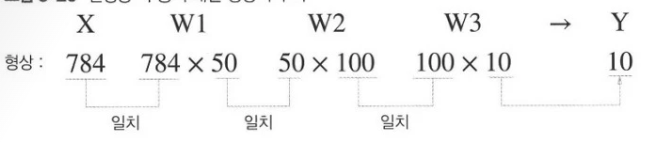

In [66]:
from IPython.display import Image, display
display(Image(filename='images/20.png', embed=True))

아래 사진은 한번에 100개의 image를 묶어서 추론 했을때 형상이다.
<br>이렇게 묶어서 하나의 입력 데이터로 만든것을 Batch라고 한다.

-> 한번에 100장의 입력 데이터에 대한 결과가 출력된다. (처리시간을 대폭 줄임)

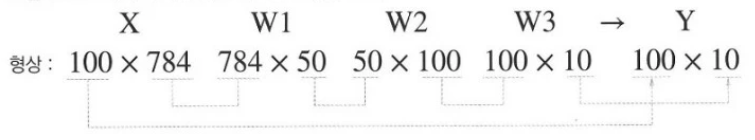

In [67]:
display(Image(filename='images/21.png', embed=True))

다른점은 입력층 $X$와 출력층 $Y$의 형상이다. <br>
이는 입력 데이터 형태가 Batch로 되어있기 때문이다.